# Exploratory Data Analysis of S&P 500
Code authored by: Shawhin Talebi

### Import modules

In [1]:
# !pip install --upgrade pip
# !pip install numpy==2.0
# !pip install matplotlib

In [2]:
import numpy as np 
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt

import yfinance as yf
import kmapper as km
from kmapper.jupyter import display
import umap
import sklearn
import sklearn.manifold as manifold
import umap.umap_ as umap 

import IPython.display as display

import warnings
warnings.simplefilter("ignore", DeprecationWarning)

### Get data

In [3]:
# directory = r"C:\Users\Donna\OneDrive - ASIAN INSTITUTE OF MANAGEMENT\(A) PAPER\SPP\Mapper\trial_matrices"

# for name in sorted(os.listdir(directory)):
#     file_path = os.path.join(directory, name)

#     if os.path.isfile(file_path) and name.endswith('.pickl'):
#         try:
#             with open(file_path, 'rb') as f:
#                 print(f"Distance matrix of {name}")
#                 data = pickle.load(f)
#                 dist_matrix = data.get('distance matrix')
#                 print(dist_matrix)
                
#                 if dist_matrix is None:
#                     print(f"Distance matrix not found in {name}")
                    
#         except (pickle.UnpicklingError, EOFError, KeyError) as e:
#             print(f"Error loading {name}: {e}")
#             continue

In [5]:
# try running only one 
file_path = r"110 2013-09-27 00_00_00.pickl"

with open(file_path, 'rb') as f:
    print(f"Distance matrix of 110 2013-09-26 00_00_00.pickl")
    data = pickle.load(f)
    dist_matrix = data.get('distance matrix')

dist_matrix = np.nan_to_num(dist_matrix, nan=0.0, posinf=0.0, neginf=0.0)

Distance matrix of 110 2013-09-26 00_00_00.pickl


In [6]:
print("Distance Matrix Shape:", dist_matrix.shape)
print("Distance Matrix Stats:")
print("Min:", np.min(dist_matrix))
print("Max:", np.max(dist_matrix))
print("Mean:", np.mean(dist_matrix))
print("Standard Deviation:", np.std(dist_matrix))

Distance Matrix Shape: (193, 193)
Distance Matrix Stats:
Min: 0.0
Max: 0.9999999999921242
Mean: 0.9338522164644938
Standard Deviation: 0.19221654682593062


In [7]:
# from sklearn.preprocessing import StandardScaler
# dist_matrix = StandardScaler().fit_transform(dist_matrix)

In [8]:
# print("Distance Matrix Shape:", dist_matrix.shape)
# print("Distance Matrix Stats:")
# print("Min:", np.min(dist_matrix))
# print("Max:", np.max(dist_matrix))
# print("Mean:", np.mean(dist_matrix))
# print("Standard Deviation:", np.std(dist_matrix))

### Mapper

In [9]:
# initialize mapper
mapper = km.KeplerMapper(verbose=1)

KeplerMapper(verbose=1)


In [10]:
# projected_data = mapper.fit_transform(
#     data,
#     projection=[manifold.Isomap(n_components=100, n_jobs=-1), umap.UMAP(n_components=2, random_state=1)]
# )

projected_data = mapper.fit_transform(
    dist_matrix,
    projection=[umap.UMAP(n_components=2, random_state=1)]
)

..Composing projection pipeline of length 1:
	Projections: UMAP(random_state=1)
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (193, 193)

..Projecting data using: 
	UMAP(random_state=1, verbose=1)

UMAP(n_jobs=1, random_state=1, verbose=1)
Sat Mar 15 17:13:11 2025 Construct fuzzy simplicial set


/opt/conda/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/bsdsba2027/dfgo/.local/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Sat Mar 15 17:13:11 2025 Finding Nearest Neighbors
Sat Mar 15 17:13:13 2025 Finished Nearest Neighbor Search
Sat Mar 15 17:13:16 2025 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Sat Mar 15 17:13:17 2025 Finished embedding

..Scaling with: MinMaxScaler()



In [11]:
projected_data.shape

(193, 2)

In [12]:
# cluster data using DBSCAN
G = mapper.map(projected_data, dist_matrix, clusterer=sklearn.cluster.DBSCAN(metric="cosine")) # 

# from sklearn.cluster import DBSCAN
# clusterer = DBSCAN(metric="cosine")
# cover = km.Cover(n_cubes=24, perc_overlap=0.9)
# F = mapper.map(projected_data, dist_matrix, clusterer=clusterer, cover=cover)

Mapping on data shaped (193, 193) using lens shaped (193, 2)

Creating 100 hypercubes.

Created 19 edges and 18 nodes in 0:00:00.044082.


From here, I start tuning n_cubes and perc_overlap.

In [13]:
# counter = 0
# list = np.arange(0.9, 1, 0.01)

# # for n in [5, 10, 20, 30]:  # Try different cube values
# #     cover = km.Cover(n_cubes=n, perc_overlap=0.2)
# #     G = mapper.map(projected_data, dist_matrix, clusterer=DBSCAN(metric="cosine"), cover=cover)
# #     print(f"Generated graph with {n} cubes")
# #     # mapper.visualize(G, path_html=f"mapper_n{n}.html", title=f"n_cubes={n}")

# for perc in list:  # Try different overlaps
#     cover = km.Cover(n_cubes=24, perc_overlap=perc)
#     trial = mapper.map(projected_data, dist_matrix, clusterer=DBSCAN(metric="cosine"), cover=cover)
#     print(f"Generated graph with overlap {perc}")
#     # mapper.visualize(trial, path_html=f"mapper_overlap{perc}.html", title=f"perc_overlap={perc}")

In [14]:
# define an excessively long filename (helpful if saving multiple Mapper variants for single dataset)
fileID = 'projection=' + G['meta_data']['projection'].split('(')[0] + '_' + \
'n_cubes=' + str(G['meta_data']['n_cubes']) + '_' + \
'perc_overlap=' + str(G['meta_data']['perc_overlap']) + '_' + \
'clusterer=' + G['meta_data']['clusterer'].split('(')[0] + '_' + \
'scaler=' + G['meta_data']['scaler'].split('(')[0]

In [15]:

# Compute color values safely
color_values = np.mean(dist_matrix, axis=1)

# Define a valid node color function (Ensure it's a list, not an array)
node_color_function = ['average', 'std', 'sum', 'max', 'min']

# Get an array the length of the number of columns
num_cols = dist_matrix.shape[1]
new_array = np.arange(1, num_cols + 1)

# Visualize graph
mapper.visualize(
    G, 
    path_html=f"mapper_example_{fileID}.html",
    title=fileID,
    custom_tooltips=new_array,
    color_values=color_values,
    color_function_name='Distance Matrix',
    node_color_function=node_color_function
)

# Display in Jupyter
display.IFrame(src=f"mapper_example_{fileID}.html", width=800, height=600)


Wrote visualization to: mapper_example_projection=UMAP_n_cubes=10_perc_overlap=0.1_clusterer=DBSCAN_scaler=MinMaxScaler.html


In [16]:
# visualize graph
mapper.visualize(G, 
                path_html="mapper_example_" + fileID + ".html",
                title=fileID,
                custom_tooltips = new_array,
                color_values = color_values,
                color_function_name = 'Distance Matrix',
                node_color_function = node_color_function
)

# mapper.visualize(
#     G, 
#     path_html=f"mapper_example_{fileID}.html",
#     title=fileID,
#     custom_tooltips=new_array,
#     color_values=color_values,
#     color_function_name='Distance Matrix',
#     node_color_function=node_color_function
# )

# display mapper in jupyter
km.jupyter.display("mapper_example_" + fileID + ".html")

Wrote visualization to: mapper_example_projection=UMAP_n_cubes=10_perc_overlap=0.1_clusterer=DBSCAN_scaler=MinMaxScaler.html


/opt/conda/lib/python3.12/site-packages/IPython/core/display.py:475: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Text(0.5, 1.0, 'cube0_cluster0')

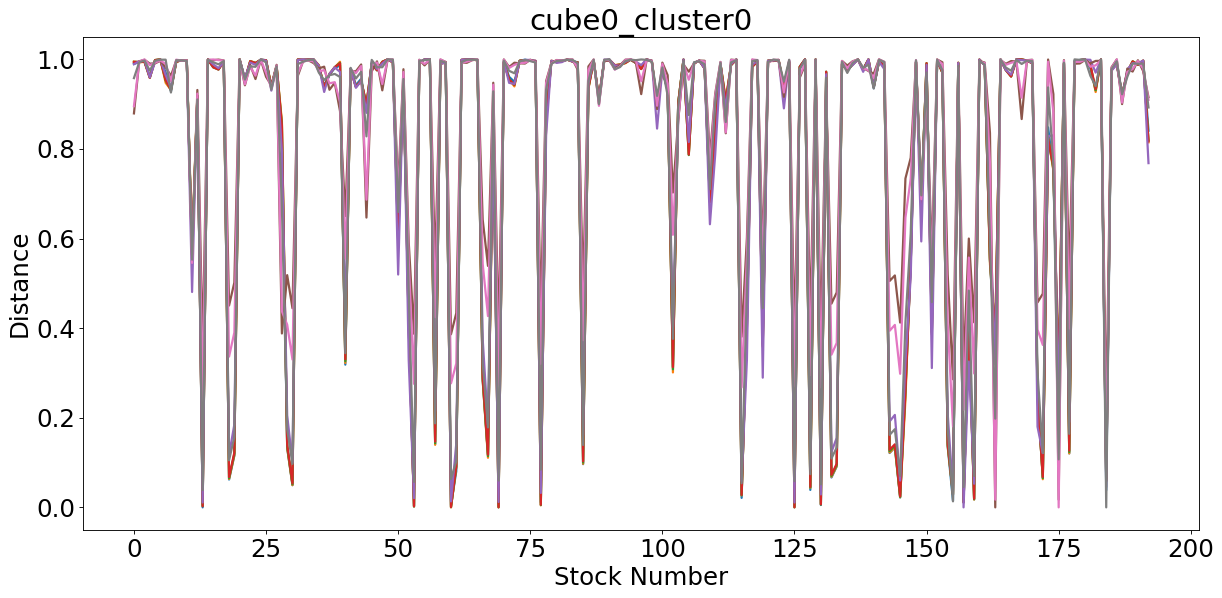

In [17]:
nodeid = 'cube0_cluster0'
node = G['nodes'][nodeid]


plt.figure(figsize=(18, 8), dpi=80)
plt.rcParams.update({'font.size': 22})

for i in node:
    plt.plot(dist_matrix[:,i], linewidth=2)
    
# plt.legend(list(dist_matrix.columns[node]), fontsize=18)
plt.xlabel('Stock Number')
plt.ylabel('Distance')
plt.title(nodeid)

# plt.savefig("mapper_example_" + fileID + ".png", dpi='figure', format=None, metadata=None,
#         bbox_inches=None, pad_inches=0.1,
#         facecolor='white', edgecolor='auto')

In [ ]:
# # convert notebook to python script
# !jupyter nbconvert --to script mapper_example.ipynb